# Lib

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)


import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sys
import os
import glob

if sys.platform=='win32':
    sys.path.insert(0,".\..\src")
        
elif sys.platform=='linux':
    sys.path.insert(0,"./../src")

from utils import utils_ml, parameters

from ipywidgets import *

In [2]:
if sys.platform=='win32':
    !dir .\
        
elif sys.platform=='linux':
    !ls ./

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � C498-8BF5

 Pasta de c:\Users\caanp\OneDrive\Documents\repositories\ML-anti-fraud\notebooks

28/11/2022  00:07    <DIR>          .
23/11/2022  00:25    <DIR>          ..
10/09/2022  23:28    <DIR>          .ipynb_checkpoints
21/11/2022  23:51         1.007.073 1.EA.ipynb
25/11/2022  01:27            74.828 2.Feature_engineering.ipynb
25/11/2022  01:27            28.364 3.Stability_var.ipynb
27/11/2022  12:46           156.602 4.Modeling.ipynb
27/11/2022  12:46           156.602 5.Modelo_analisis_negocio.ipynb
25/11/2022  01:32           156.224 6.Pipeline.ipynb
25/11/2022  01:32           156.224 7.Pipeline_SPARK.ipynb
24/11/2022  23:44    <DIR>          catboost_info
               7 arquivo(s)      1.735.917 bytes
               4 pasta(s)   355.575.644.160 bytes dispon�veis


In [3]:
!dir .\..\src

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � C498-8BF5

 Pasta de c:\Users\caanp\OneDrive\Documents\repositories\ML-anti-fraud\src

15/11/2022  20:32    <DIR>          .
23/11/2022  00:25    <DIR>          ..
24/11/2022  23:29    <DIR>          features
26/11/2022  15:24    <DIR>          utils
11/09/2022  00:21    <DIR>          __pycache__
               0 arquivo(s)              0 bytes
               5 pasta(s)   355.575.513.088 bytes dispon�veis


# Reading

In [4]:
## para saber en que directório uno se encuentra
#
if sys.platform=='win32':
    !echo %cd%
        
elif sys.platform=='linux':
    !pwd

c:\Users\caanp\OneDrive\Documents\repositories\ML-anti-fraud\notebooks


In [5]:
if sys.platform=='win32':
    df = pd.read_csv('.\..\data\dados.csv')
        
elif sys.platform=='linux':
    df = pd.read_csv('./../data/dados.csv')


## dropping column "o" becaise it has 78% missing. and this is a boolean columns
# df.drop("o", axis=1, inplace=True)

# EA

In [6]:
df.rename(columns={"a":"a_int",
                    "p":"p_boolean","n":'n_boolean',
                     "k":"k_float","e":"e_float","h":"h_float","l":"l_float","f":"f_float","m":"m_float","m":"m_float","b":"b_float","c":"c_float","d":"d_float","o":"o_obj",
                     'i': 'produto','j':'categoria_produto','g':'pais'}
       , inplace = True)

## Transform categorical features
df['n_boolean'] = df['n_boolean'].astype("category")
df['p_boolean'] = df['p_boolean'].astype("category")


## creating columns os date and hour
df['data'] = df['fecha'].apply(lambda x: x[:10])
df['hora'] = df['fecha'].apply(lambda x: x[10:])

In [7]:
## saving
df.to_parquet(f"{parameters.data_path}\\dataset_structed.parquet", index=False)

In [8]:
miss_df = utils_ml.missing_zeros(df)
miss_df.sort_values(by="T_missing").reset_index(drop=True)

## Tabela permite analisar a distribuição da variável caso seja contínua e verificar a possibilidade de preencher com a media ou mediana dado o cv.
## Para variáveis númericas, temos a moda e a frequência desta.


,Column,size MB,Type,T_rows,Cardinality,T_missing,T_zeros,%_missing,%_zeros,Mode,freq,mean,std,min,25%,50%,75%,max,cv
0,a_int,1.14,int64,150000,4,0,0,0.000,0.000,,,3.705407,0.753206,1.0,4.0,4.0,4.0,4.0,0.203272
1,fraude,1.14,int64,150000,2,0,0,0.000,0.000,,,0.05,0.217946,0.0,0.0,0.0,0.0,1.0,4.358913
2,score,1.14,int64,150000,101,0,0,0.000,0.000,,,48.06624,28.995122,0.0,23.0,48.0,73.0,100.0,0.603233
3,monto,1.14,float64,150000,17831,0,0,0.000,0.000,,,43.523134,91.557888,0.02,9.38,20.61,40.6925,3696.35,2.10366
4,fecha,10.87,object,150000,145813,0,0,0.000,0.000,2020-03-19 15:30:23,4,,,,,,,,
5,p_boolean,0.14,category,150000,2,0,0,0.000,0.000,Y,83129,,,,,,,,
6,n_boolean,0.14,category,150000,2,0,0,0.000,0.000,1.0,135353.0,,,,,,,,
7,data,9.58,object,150000,45,0,0,0.000,0.000,2020-04-20,5314,,,,,,,,
8,categoria_produto,9.73,object,150000,8324,0,0,0.000,0.000,cat_43b9c10,2331,,,,,,,,
9,k_float,1.14,float64,150000,150000,0,0,0.000,0.000,,,0.497532,0.288348,0.000004,0.246819,0.49599,0.746508,0.999995,0.579555


In [53]:
# df

# Association

In [54]:
cats_cols = utils_ml.list_subset_words( df.columns.tolist() , ["bool","cat",'obj','pais'])

In [55]:
df_chi_ls = []

for cat_column in cats_cols:


    df_chi = utils_ml.chi_square_test(df, 'fraude', cat_column )
    df_chi.rename({"Variable_1":"Target"}, axis=1, inplace=True)

    df_chi_ls.append(df_chi)

df_chi2 = pd.concat(df_chi_ls)

In [56]:
df_chi2

,Target,Variable_2,p-value,p_value_result,result
0,fraude,n_boolean,0.000000e+00,p <= 0.05,Dependent (reject H0)
0,fraude,p_boolean,0.000000e+00,p <= 0.05,Dependent (reject H0)
0,fraude,categoria_produto,2.634339e-112,p <= 0.05,Dependent (reject H0)
0,fraude,o_obj,0.000000e+00,p <= 0.05,Dependent (reject H0)
0,fraude,pais,7.757972e-63,p <= 0.05,Dependent (reject H0)


In [57]:
numeric_cols = [x for x in df.columns.tolist() if df[x].dtype.name!="object" and df[x].dtype.name!="category" and x!="fraude" ]

corr = df[numeric_cols].corr("spearman")

<AxesSubplot:>

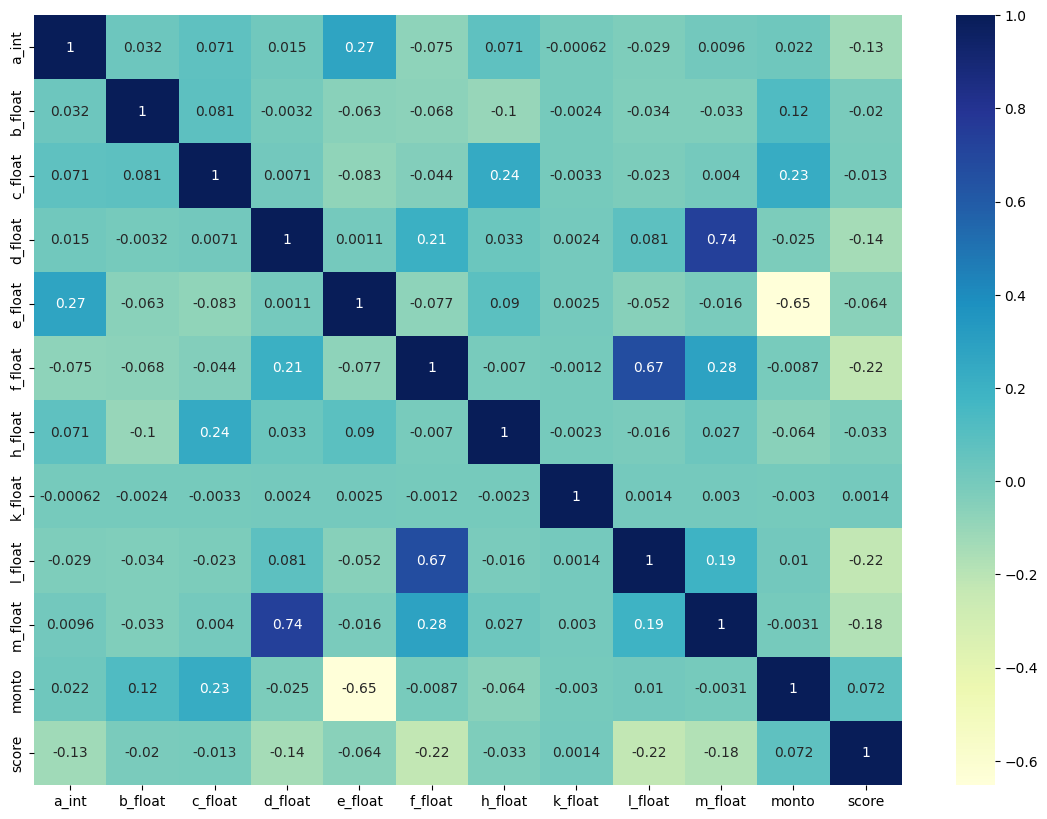

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr,  annot=True,cmap="YlGnBu" )

<AxesSubplot: xlabel='d_float', ylabel='m_float'>

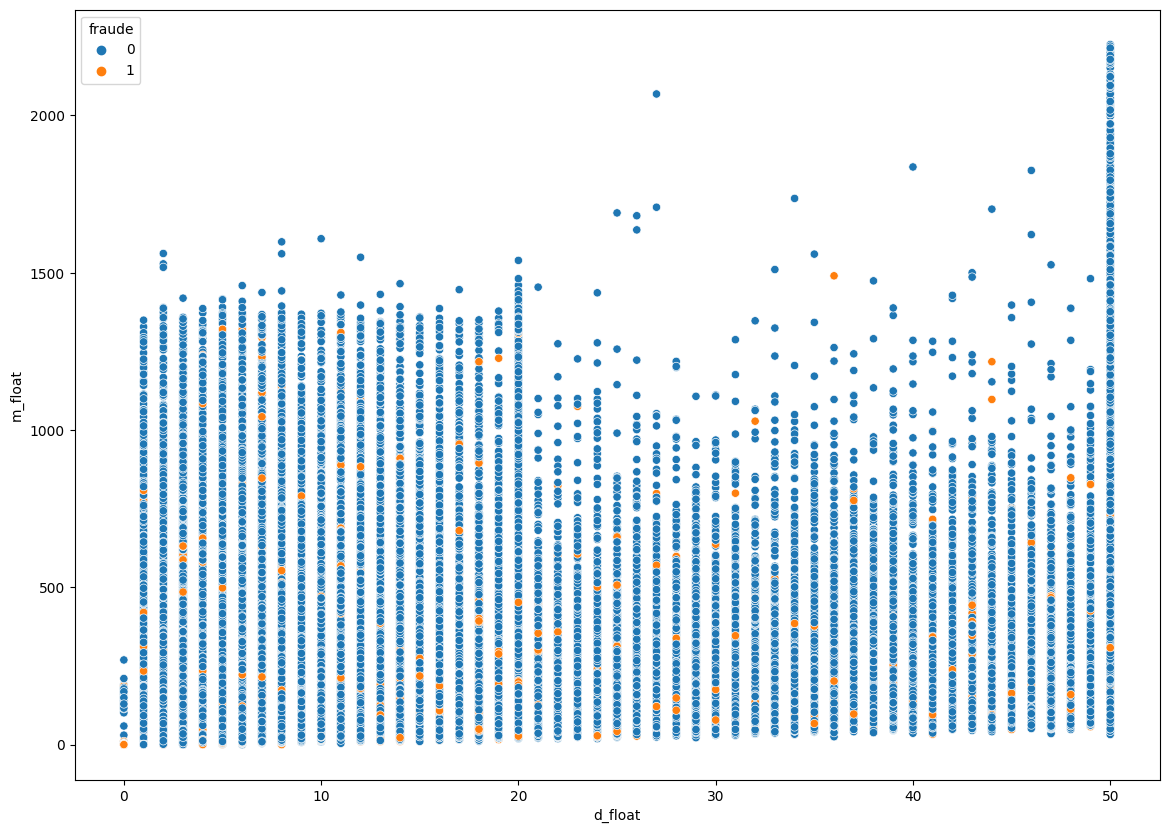

In [26]:
f, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot( df, x="d_float", y="m_float", hue="fraude" )

<AxesSubplot: xlabel='f_float', ylabel='l_float'>

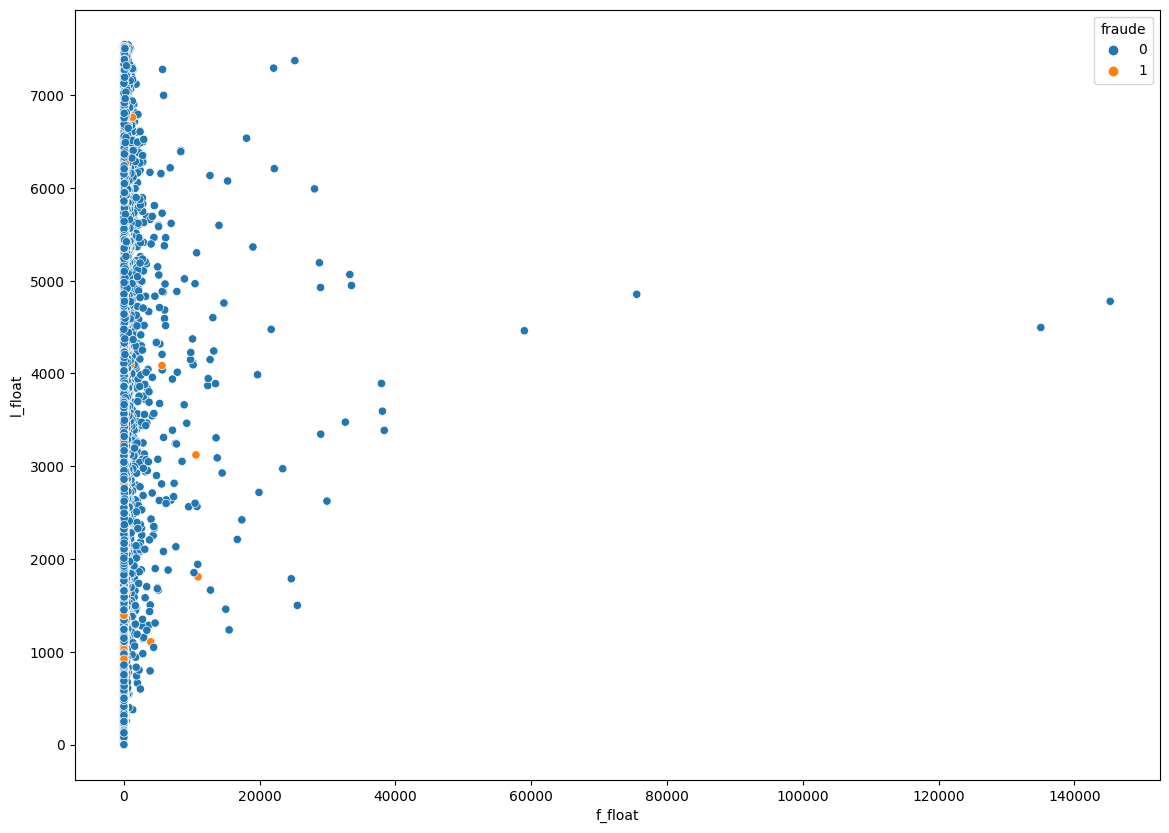

In [27]:
f, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot( df, x="f_float", y="l_float",hue="fraude" )

# IV and WoE

In [20]:
df_ivs_ls = []

for variable in df.columns.tolist():

    label = "fraude"
    dtype_ = 'categorical' if df[variable].dtype=='O' or df[variable].dtype=='category' else 'numerical'

    df_iv = utils_ml.WOE_IV(df = df , variable = variable, dtype_ = dtype_ , label = label, monotonic= True)[[ 'variable' , 'IV_var', 'KS']].drop_duplicates()

    df_ivs_ls.append(df_iv)

pd.concat(df_ivs_ls).sort_values("IV_var", ascending=False)

,variable,IV_var,KS
0,fecha,12.113640,99.544561
0,produto,6.369097,88.306667
0,hora,4.346361,84.314386
0,categoria_produto,1.641776,39.766316
0,o_obj,1.094238,44.994386
0,score,1.021894,43.152982
0,f_float,0.447805,27.785965
0,l_float,0.439939,25.305965
0,n_boolean,0.361450,22.844211
0,m_float,0.337380,22.929825


In [21]:
@interact

def display_metrics(variable = pd.concat(df_ivs_ls).sort_values("IV_var", ascending=False)['variable'].tolist() ):

    label = "fraude"
    dtype_ = 'categorical' if df[variable].dtype.name=='object' or df[variable].dtype.name=='category'  else 'numerical'

    display(utils_ml.WOE_IV(df = df , variable = variable, dtype_ = dtype_ , label = label, monotonic= True))




interactive(children=(Dropdown(description='variable', options=('fecha', 'produto', 'hora', 'categoria_produto…

# Metrics to model: score column

In [23]:
probability = "score"
label="fraude"
quantil=20

utils_ml.metric_evaluation(df, probability, label, quantil)


,total,faixa_prob,total_um,total_zero,TP,FP,TN,FN,perc_um,perc_zero,csum_um,csum_zero,ks,recall,precision,specificity,F1,F2
quantil,,,,,,,,,,,,,,,,,,
0,7500,"[0, 3]",227,7273,7500,142500,0,0,3.026667,5.103860,3.026667,5.103860,42.975439,1.000000,0.050000,0.000000,0.095238,0.208333
1,7500,"[3, 8]",190,7310,7273,135227,7273,227,2.533333,5.129825,5.560000,10.233684,42.975439,0.969733,0.051039,0.051039,0.096973,0.210812
2,7500,"[8, 13]",320,7180,7083,127917,14583,417,4.266667,5.038596,9.826667,15.272281,42.975439,0.944400,0.052467,0.102337,0.099411,0.214636
3,7500,"[13, 18]",372,7128,6763,120737,21763,737,4.960000,5.002105,14.786667,20.274386,42.975439,0.901733,0.053043,0.152723,0.100193,0.214698
4,7500,"[18, 23]",322,7178,6391,113609,28891,1109,4.293333,5.037193,19.080000,25.311579,42.975439,0.852133,0.053258,0.202744,0.100251,0.213033
5,7500,"[23, 28]",172,7328,6069,106431,36069,1431,2.293333,5.142456,21.373333,30.454035,42.975439,0.809200,0.053947,0.253116,0.101150,0.212947
6,7500,"[28, 33]",16,7484,5897,99103,43397,1603,0.213333,5.251930,21.586667,35.705965,42.975439,0.786267,0.056162,0.304540,0.104836,0.218407
7,7500,"[33, 38]",30,7470,5881,91619,50881,1619,0.400000,5.242105,21.986667,40.948070,42.975439,0.784133,0.060318,0.357060,0.112019,0.230627
8,7500,"[38, 43]",36,7464,5851,84149,58351,1649,0.480000,5.237895,22.466667,46.185965,42.975439,0.780133,0.065011,0.409481,0.120021,0.243792


<AxesSubplot: ylabel='Frequency'>

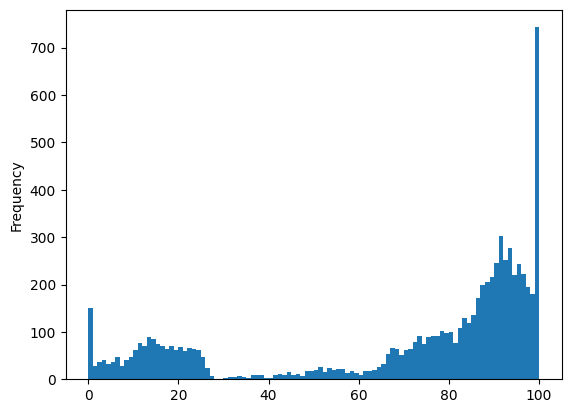

In [33]:
df.loc[df['fraude']==1,'score'].plot(kind='hist', bins=100)

<AxesSubplot: ylabel='Frequency'>

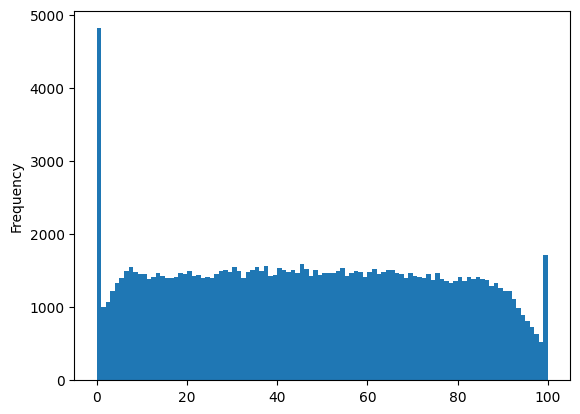

In [34]:
df.loc[df['fraude']==0,'score'].plot(kind='hist', bins=100)

# requirements

In [36]:
path_root = parameters.root
!pip list --format=freeze > $path_root/requirements.txt
